In [48]:
import pandas as pd
data = pd.read_csv('soil_pollution_diseases.csv')

In [49]:
data.head()

,Case_ID,Date_Reported,Region,Country,Pollutant_Type,Pollutant_Concentration_mg_kg,Soil_pH,Temperature_C,Humidity_%,Rainfall_mm,...,Soil_Texture,Soil_Organic_Matter_%,Disease_Type,Disease_Severity,Health_Symptoms,Age_Group_Affected,Gender_Most_Affected,Mitigation_Measure,Case_Resolved,Follow_Up_Required
0,CASE_100000,2024-09-12,Africa,Pakistan,Lead,78.04,8.30,35.6,64.9,62.4,...,Sandy,1.98,Gastrointestinal Disease,Moderate,Breathing Difficulty,Adults,Male,Government Regulation,No,Yes
1,CASE_100001,2024-01-01,Africa,Germany,Lead,16.33,7.96,31.0,73.1,8.2,...,Silty,9.71,Cancer,Mild,Breathing Difficulty,Elderly,Both,Community Awareness,Yes,No
2,CASE_100002,2025-02-24,Europe,Germany,Lead,167.33,5.35,16.4,33.8,121.7,...,Clay,5.49,Gastrointestinal Disease,Severe,Nausea,Children,Both,Soil Remediation,Yes,No
3,CASE_100003,2024-09-24,Asia,USA,Lead,89.23,5.66,31.4,30.5,116.9,...,Silty,3.98,Neurological Disorder,Severe,Fatigue,Adults,Male,Community Awareness,Yes,No
4,CASE_100004,2023-05-24,Africa,India,Chromium,93.93,7.64,17.0,58.6,237.0,...,Loamy,0.94,Skin Disease,Moderate,Breathing Difficulty,Children,Female,Government Regulation,Yes,Yes


In [50]:
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Case_ID                        3000 non-null   object 
 1   Date_Reported                  3000 non-null   object 
 2   Region                         3000 non-null   object 
 3   Country                        3000 non-null   object 
 4   Pollutant_Type                 3000 non-null   object 
 5   Pollutant_Concentration_mg_kg  3000 non-null   float64
 6   Soil_pH                        3000 non-null   float64
 7   Temperature_C                  3000 non-null   float64
 8   Humidity_%                     3000 non-null   float64
 9   Rainfall_mm                    3000 non-null   float64
 10  Crop_Type                      3000 non-null   object 
 11  Farming_Practice               3000 non-null   object 
 12  Nearby_Industry                2418 non-null   o

Case_ID                            0
Date_Reported                      0
Region                             0
Country                            0
Pollutant_Type                     0
Pollutant_Concentration_mg_kg      0
Soil_pH                            0
Temperature_C                      0
Humidity_%                         0
Rainfall_mm                        0
Crop_Type                          0
Farming_Practice                   0
Nearby_Industry                  582
Water_Source_Type                  0
Soil_Texture                       0
Soil_Organic_Matter_%              0
Disease_Type                       0
Disease_Severity                   0
Health_Symptoms                    0
Age_Group_Affected                 0
Gender_Most_Affected               0
Mitigation_Measure                 0
Case_Resolved                      0
Follow_Up_Required                 0
dtype: int64

In [51]:

data = data.dropna()
data.isnull().sum()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2418 entries, 0 to 2999
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Case_ID                        2418 non-null   object 
 1   Date_Reported                  2418 non-null   object 
 2   Region                         2418 non-null   object 
 3   Country                        2418 non-null   object 
 4   Pollutant_Type                 2418 non-null   object 
 5   Pollutant_Concentration_mg_kg  2418 non-null   float64
 6   Soil_pH                        2418 non-null   float64
 7   Temperature_C                  2418 non-null   float64
 8   Humidity_%                     2418 non-null   float64
 9   Rainfall_mm                    2418 non-null   float64
 10  Crop_Type                      2418 non-null   object 
 11  Farming_Practice               2418 non-null   object 
 12  Nearby_Industry                2418 non-null   object

In [52]:
data.describe()

,Pollutant_Concentration_mg_kg,Soil_pH,Temperature_C,Humidity_%,Rainfall_mm,Soil_Organic_Matter_%
count,2418.000000,2418.000000,2418.000000,2418.000000,2418.000000,2418.000000
mean,101.928776,6.465897,27.393921,57.945616,201.740653,5.183205
std,56.199321,1.165226,10.110988,21.344030,115.626858,2.772318
min,5.030000,4.500000,10.000000,20.000000,0.000000,0.500000
25%,52.800000,5.452500,18.600000,39.500000,100.625000,2.752500
50%,103.290000,6.470000,27.200000,58.300000,201.100000,5.145000
75%,150.877500,7.490000,36.000000,76.500000,302.600000,7.557500
max,199.960000,8.500000,45.000000,95.000000,399.700000,10.000000


In [53]:
if 'Pollutant_Concentration' in data.columns and 'Soil_pH' in data.columns:
    data['Pollution_Risk'] = data['Pollutant_Concentration'] * (1 - data['Soil_pH'] / 14)

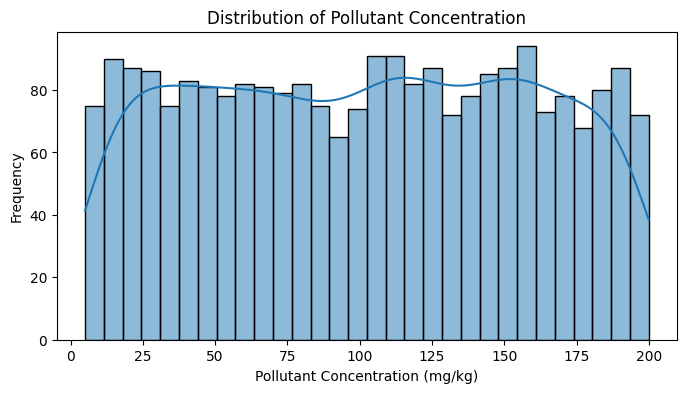

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Pollutant Concentration
plt.figure(figsize=(8, 4))
sns.histplot(data['Pollutant_Concentration_mg_kg'], kde=True, bins=30)
plt.title('Distribution of Pollutant Concentration')
plt.xlabel('Pollutant Concentration (mg/kg)')
plt.ylabel('Frequency')
plt.show()

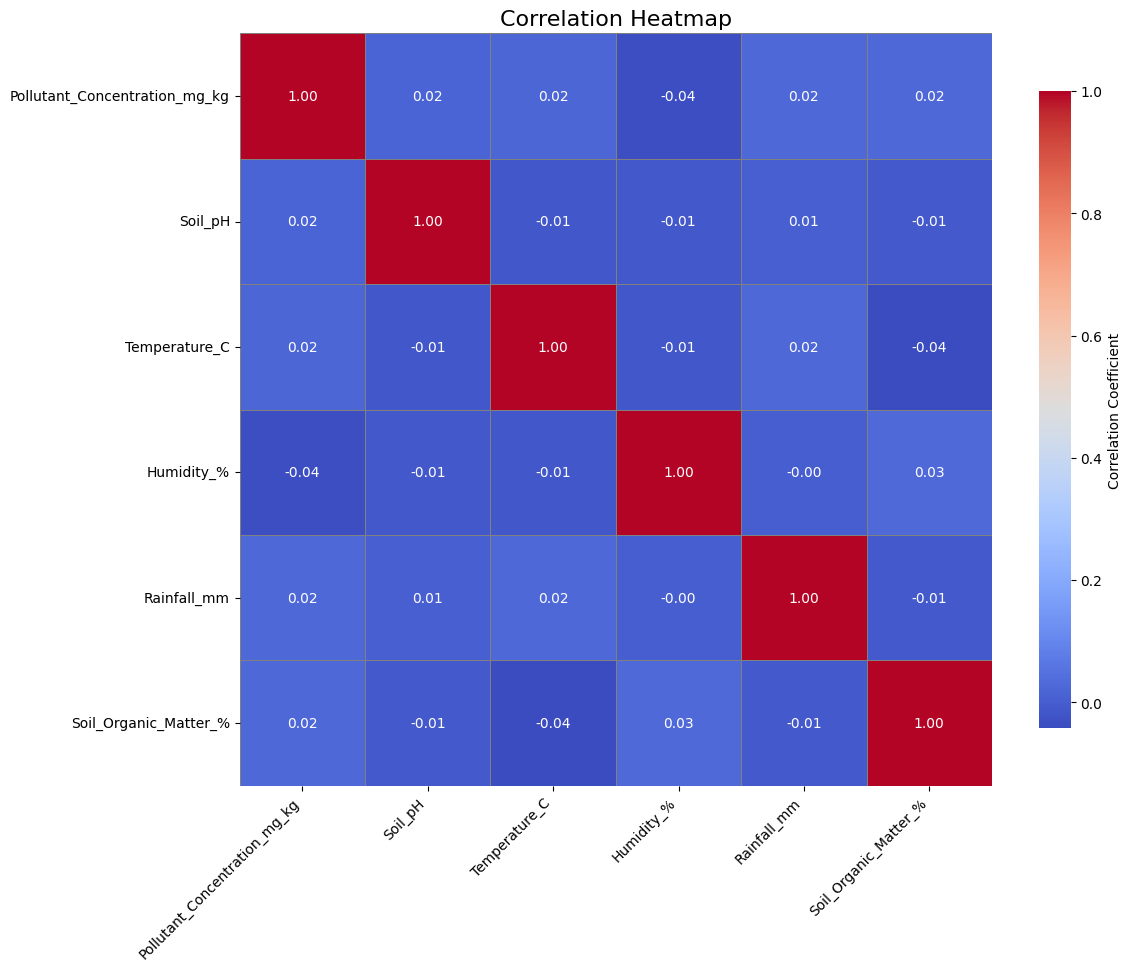

In [55]:
# Correlation heatmap for numerical features (improved clarity)
plt.figure(figsize=(12, 10))
numeric_data = data.select_dtypes(include=['number', 'bool'])
corr = numeric_data.corr()

sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    linewidths=0.5,
    linecolor='gray',
    square=True,
    cbar_kws={"shrink": 0.8, "label": "Correlation Coefficient"}
)
plt.title('Correlation Heatmap', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

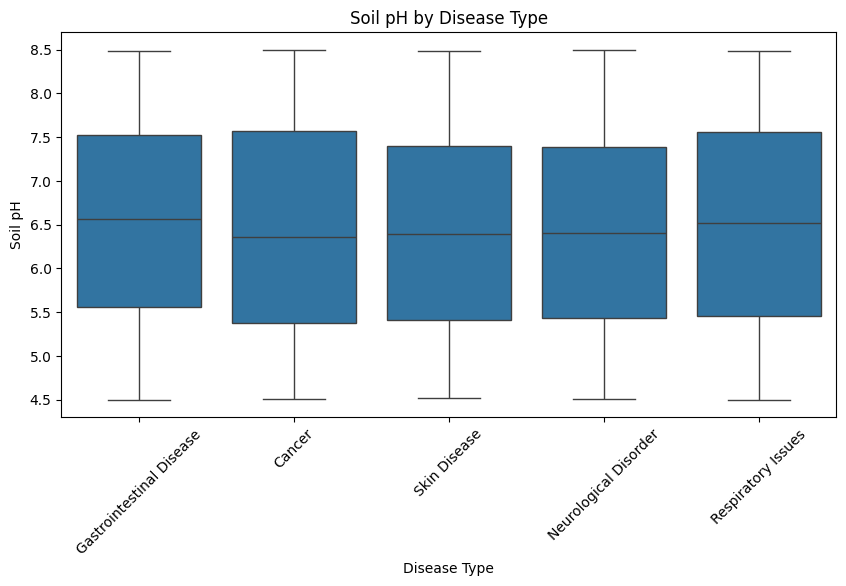

In [56]:
# Boxplot of Soil pH by Disease Type (if Disease_Type exists)
if 'Disease_Type' in data.columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='Disease_Type', y='Soil_pH', data=data)
    plt.title('Soil pH by Disease Type')
    plt.xlabel('Disease Type')
    plt.ylabel('Soil pH')
    plt.xticks(rotation=45)
    plt.show()


In [57]:

from sklearn.preprocessing import StandardScaler, LabelEncoder

data = data.fillna(method='ffill')

categorical_cols = ['Pollutant_Type', 'Water_Source_Type', 'Region']
for col in categorical_cols:
    if col in data.columns:
        data = pd.get_dummies(data, columns=[col])

if 'Pollutant_Concentration' in data.columns and 'Soil_pH' in data.columns:
    data['Pollution_Risk'] = data['Pollutant_Concentration'] * (1 - data['Soil_pH'] / 14)


if 'Age_Group_Affected' in data.columns and data['Age_Group_Affected'].dtype == object:
    le = LabelEncoder()
    data['Age_Group_Affected'] = le.fit_transform(data['Age_Group_Affected'])

num_cols = ['Pollutant_Concentration', 'Soil_pH', 'Age_Group_Affected']
num_cols = [col for col in num_cols if col in data.columns]
if num_cols:
    scaler = StandardScaler()
    data[num_cols] = scaler.fit_transform(data[num_cols])

for col in num_cols:
    data = data[(data[col] < 3) & (data[col] > -3)]

if 'Date_Reported' in data.columns:
    data['Date_Reported'] = pd.to_datetime(data['Date_Reported'])
    data['Month'] = data['Date_Reported'].dt.month
    data['Year'] = data['Date_Reported'].dt.year


data.to_csv('preprocessed_soil_pollution.csv', index=False)

C:\Users\Badhri Prasath D R\AppData\Local\Temp\ipykernel_14980\1953227260.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')
